<a href="https://colab.research.google.com/github/NAHELALFATH/AI-FGA/blob/master/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q anaconda quandl

     |████████████████████████████████| 61kB 26.9MB/s 
     |████████████████████████████████| 61kB 26.7MB/s 
     |████████████████████████████████| 2.3MB 4.1MB/s 
     |████████████████████████████████| 102kB 36.7MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.


In [0]:
import quandl

In [0]:

quandl.ApiConfig.api_key = "_5Hm_XCQxewstqhDLAmJ"

In [0]:
# API Call example - Downloading financial data from IBM stocks
data = quandl.get_table('WIKI/PRICES',
                        ticker='IBM', 
                        qopts={'columns':['date', 'open', 'high', 'low', 'close']},
                        paginate=True)

In [0]:
# Renaming the pandas dataframe columns
data.columns = ['Date', 'Open', 'High', 'Low', 'Close']

# Reset the pandas dataframe index
data = data.reset_index(drop=True)

# Show the last five rows of the pandas dataframe
data.tail()

,Date,Open,High,Low,Close
14150,1962-01-08,559.5,559.5,545.0,549.50
14151,1962-01-05,570.5,570.5,559.0,560.00
14152,1962-01-04,577.0,577.0,571.0,571.25
14153,1962-01-03,572.0,577.0,572.0,577.00
14154,1962-01-02,578.5,578.5,572.0,572.00


In [0]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.embed import components
from bokeh.io import output_notebook

print('Packages imported.')

Packages imported.


In [0]:
# Load bokeh
output_notebook()

In [0]:
# Bokeh Figure
p = figure(plot_width=1200, plot_height=550, title='Stock Value Historical Data', x_axis_type="datetime")

# Plot Lines
p.line(data.Date, data.Open, line_width=2, line_color="#0099ff", legend='Open')
p.line(data.Date, data.Close, line_width=2, line_color="#ff6699", legend='Close')
p.line(data.Date, data.High, line_width=1, line_color="#000000", legend='High')
p.line(data.Date, data.Low, line_width=1, line_color="#000000", legend='Low')

# Axis and Labels
p.legend.orientation = "vertical"
p.xaxis.axis_label = "Date"
p.xaxis.axis_label_text_font_style = 'bold'
p.xaxis.axis_label_text_font_size = '16pt'
p.xaxis.major_label_text_font_size = '14pt'
p.yaxis.axis_label = "Value ($ USD)"
p.yaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_size = '16pt'
p.yaxis.major_label_text_font_size = '12pt'

In [0]:
show(p)

In [0]:
from fbprophet import Prophet
import datetime as dt

print('Packages imported.')

Packages imported.


In [0]:
# Select train sample
df_train = data.copy()
df_train = df_train[(df_train.Date > dt.datetime(2005,1,1))]
df_train.tail()

,Date,Open,High,Low,Close
3325,2005-01-07,96.50,96.80,95.47,95.78
3326,2005-01-06,96.54,96.98,96.05,96.20
3327,2005-01-05,96.60,97.83,96.40,96.50
3328,2005-01-04,97.74,98.42,96.52,96.70
3329,2005-01-03,98.97,99.10,97.25,97.75


In [0]:
# Format the dataframe for FBProphet
df_train.rename(columns={'Open':'y', 'Date':'ds'}, inplace=True)
df_train = df_train.filter(items=['ds', 'y'])
df_train.tail()

,ds,y
3325,2005-01-07,96.50
3326,2005-01-06,96.54
3327,2005-01-05,96.60
3328,2005-01-04,97.74
3329,2005-01-03,98.97


In [0]:
# Instantiate a fbprophet model
model = Prophet(daily_seasonality=False,
                weekly_seasonality=False, 
                yearly_seasonality=True,
                changepoint_prior_scale=0.05,
                changepoints=None)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [0]:
# Train model
model.fit(df_train)

In [0]:
# Execute forecasting algorithm (1 year into the future)
future_data = model.make_future_dataframe(periods=365, freq='D')
future_data = model.predict(future_data)
future_data.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3690,2019-03-23,162.804610,146.066215,184.376093,145.234319,176.746397,3.271184,3.271184,3.271184,-0.271689,-0.271689,-0.271689,3.542873,3.542873,3.542873,0.0,0.0,0.0,166.075794
3691,2019-03-24,162.814874,145.548526,183.538595,145.215065,176.819020,3.469383,3.469383,3.469383,-0.262173,-0.262173,-0.262173,3.731556,3.731556,3.731556,0.0,0.0,0.0,166.284256
3692,2019-03-25,162.825137,145.308013,183.922057,145.195812,176.891643,3.827961,3.827961,3.827961,-0.081236,-0.081236,-0.081236,3.909197,3.909197,3.909197,0.0,0.0,0.0,166.653098
3693,2019-03-26,162.835401,146.800236,184.522460,145.176559,176.964266,4.158211,4.158211,4.158211,0.084961,0.084961,0.084961,4.073250,4.073250,4.073250,0.0,0.0,0.0,166.993612
3694,2019-03-27,162.845665,145.441207,183.962307,145.145116,177.036889,4.267378,4.267378,4.267378,0.046038,0.046038,0.046038,4.221340,4.221340,4.221340,0.0,0.0,0.0,167.113043


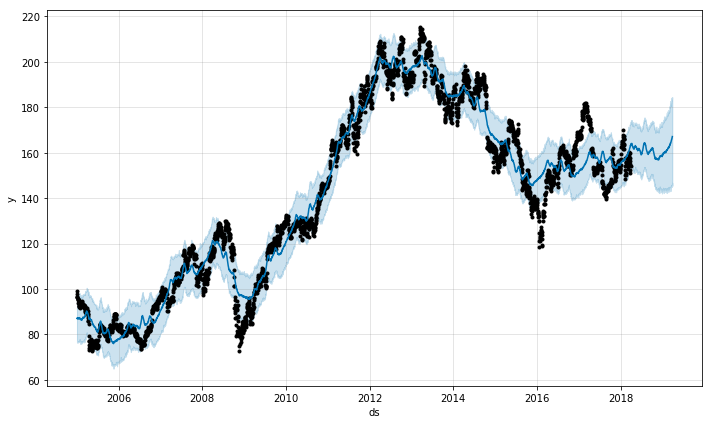

In [0]:
fig1 = model.plot(future_data)

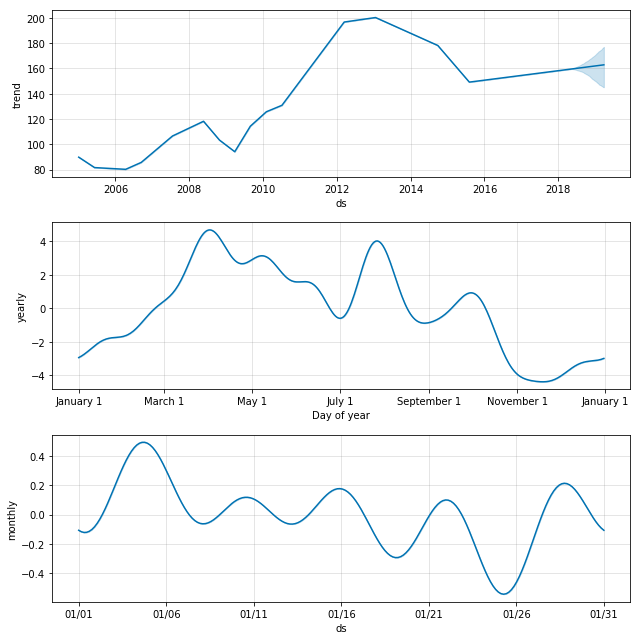

In [0]:
fig2 = model.plot_components(future_data)

In [0]:
# Bokeh Figure
p = figure(plot_width=1200, plot_height=550, title='Stock Value Historical Data', x_axis_type="datetime")

# Plot Lines
p.line(data[data['Date'] > dt.datetime(2008,1,1)].Date, data[data['Date'] > dt.datetime(2008,1,1)].Open, line_width=2, line_color="#0099ff", legend='Observed Open Value')
p.line(future_data.ds, future_data.yhat, line_width=2, line_color="#2B0000", legend='Modeled Open Value')
p.line(future_data.ds, future_data.yhat_upper, line_width=0.5, line_color="#000099", legend='Upper Estimates')
p.line(future_data.ds, future_data.yhat_lower, line_width=0.5, line_color="#000099", legend='Lower Estimates')

# Axis and Labels
p.legend.orientation = "vertical"
p.xaxis.axis_label = "Date"
p.xaxis.axis_label_text_font_style = 'bold'
p.xaxis.axis_label_text_font_size = '16pt'
p.xaxis.major_label_text_font_size = '14pt'
p.yaxis.axis_label = "Value ($ USD)"
p.yaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_size = '16pt'
p.yaxis.major_label_text_font_size = '12pt'
show(p)

In [0]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_cv.head()

INFO:fbprophet:Making 15 forecasts with cutoffs between 2010-05-03 00:00:00 and 2017-03-27 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-05-04,130.125353,126.589019,133.449871,128.89,2010-05-03
1,2010-05-05,129.849046,126.273978,133.485495,127.12,2010-05-03
2,2010-05-06,129.896752,126.397123,133.556600,126.29,2010-05-03
3,2010-05-07,130.086849,126.725366,133.433808,123.36,2010-05-03
4,2010-05-10,128.465632,124.931990,132.210331,126.27,2010-05-03


In [0]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,37 days,93.917284,9.691093,8.098506,0.048515,0.404630
1,38 days,94.464600,9.719290,8.116347,0.048627,0.406800
2,39 days,95.461931,9.770462,8.151825,0.048875,0.406559
3,40 days,98.132013,9.906160,8.275073,0.049647,0.398843
4,41 days,100.302406,10.015109,8.387325,0.050319,0.393899


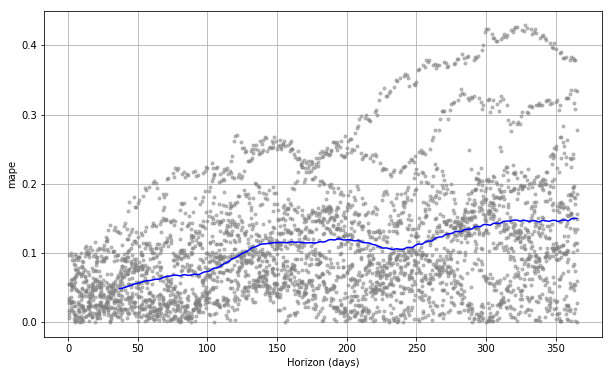

In [0]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')